# Imports

In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
from scipy.optimize import minimize
# from matplotlib import colors as mcolors
from pathlib import Path

import os
import sys
sys.path.append('../')  # Add parent directory to the Python path

import package_DBR
import package_LAB

from importlib import reload
package_DBR = reload (package_DBR)
package_LAB = reload(package_LAB)

from package_LAB import *
from package_DBR import *

# Load Data

In [2]:
nameFile = "Cleaned_data_Open_loop_experiment_on_MV_2024-03-11-09h21.txt"
# nameFile = "Cleaned_data_Open_loop_experiment_on_DV_2024-03-27-17h23"
# titleName = nameFile.split('.')[0]

dataFilePath = "../Data/" + nameFile
print(os.path.abspath('../Data/'))
print(os.path.abspath(dataFilePath))

data = pd.read_csv(dataFilePath)


if "MV" in nameFile :
    ExpVariable = "MV"
    tm = data['tm'].values# - data['t'].values[0]
    MVm = data['MVm'].values
    PVm = data['PVm'].values

else:
    ExpVariable = "DV"
    tm = data['tm'].values
    DVm = data['DVm'].values
    PVm = data['PVm'].values

print(ExpVariable)


c:\Users\vassi\OneDrive\Bureau\Cours\BA3\Q2\Control_Theory\Laboratory\Control_theory_software_V3\Data
c:\Users\vassi\OneDrive\Bureau\Cours\BA3\Q2\Control_Theory\Laboratory\Control_theory_software_V3\Data\Cleaned_data_Open_loop_experiment_on_MV_2024-03-11-09h21.txt
MV


# Approximations Methods

### Parameters (obtained via Tangent at Inflexion Method)

In [3]:
# Méthode de la Tangente au point d'inflexion
Kp = 0.4             # Process gain (affect MV and PV)
T1 = 72 #83
T2 = 99 #110
# theta = 5.12 
a = 0.123
T_g = 220 #188
T_u = 10 #17



Ts = 1  # Value Imposed
TSim = len(MVm)


### FOPDT (Simple Broida Method)

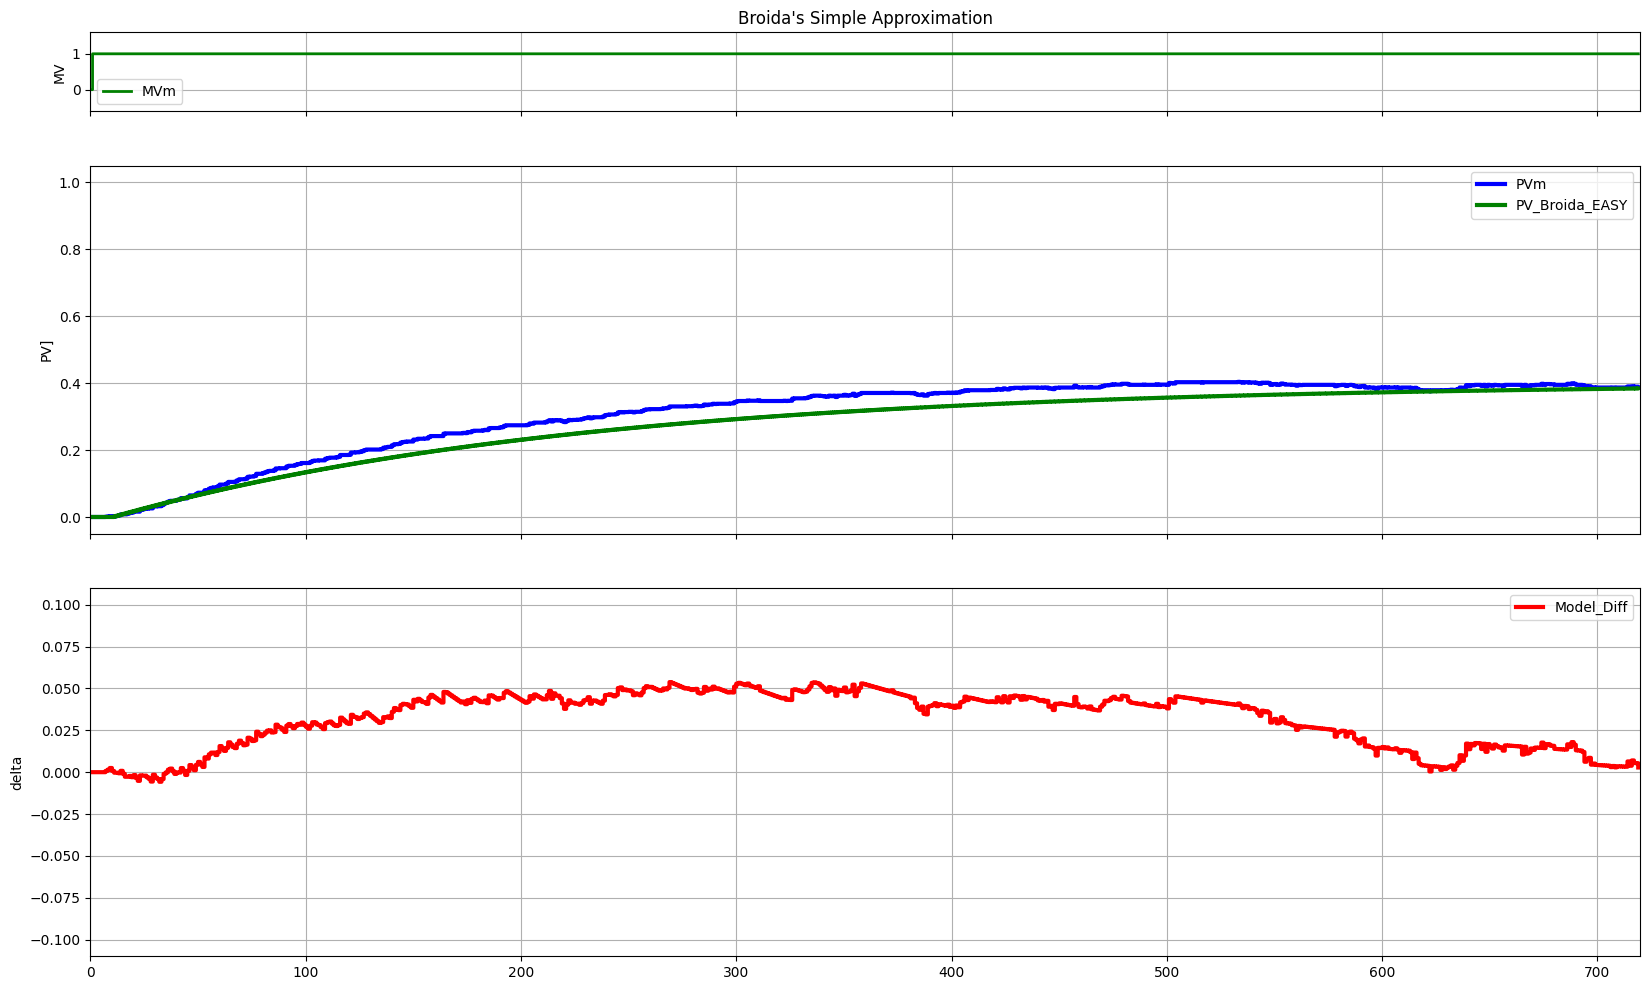

In [4]:
# T = T_g and theta = T_u
Kp_Broida_EASY = Kp
T_Broida_EASY = T_g
theta_Broida_EASY = T_u

#FOPDT(MV,Kp,T,theta,Ts,MVInit=0,PVInit=0,method='EBD'):
PV_Broida_EASY = FOPDT(MV=MVm, Kp=Kp_Broida_EASY, T=T_Broida_EASY, theta=theta_Broida_EASY, Ts=Ts, PVInit=0, method='EBD')


#============PLOT===========================
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,ncols=1, sharex='col', gridspec_kw={'height_ratios': [1.5, 7, 7]})
fig.set_figheight(12)
fig.set_figwidth(20)

ax1.set_title("Broida's Simple Approximation")

#--MV
limSup = 1.5
limInf = -0.5
l1, = ax1.step([0,TSim], [limInf,limSup], 'green',linewidth=2, label='MVm', where="post")
ax1.set_ylabel('MV')
ax1.legend (loc='best')

#----PV
limSup = 1
limInf = 0
l2, = ax2.step([0, TSim], [limInf,limSup], 'blue', linewidth=3, label='PVm', where='post') 
l3, = ax2.step([0, TSim], [limInf,limSup], 'green', linewidth=3, label='PV_Broida_EASY', where='post') 
ax2.set_ylabel('PV]')
ax2.legend (loc='best')

#---Model_Diff
limSup = 0.1
limInf = -0.1
diff_BroidaEASY_PV = [a - b for a,b in zip(PVm, PV_Broida_EASY)]
l4, = ax3.step([0, TSim], [limInf,limSup], 'red', linewidth=3, label='Model_Diff', where='post') 
ax3.set_ylabel('delta')
ax3.legend (loc='best')


#-----Set Data-----
l1.set_data(tm, MVm)

l2.set_data(tm,PVm)
l3.set_data(tm, PV_Broida_EASY)

l4.set_data(tm,diff_BroidaEASY_PV)


tMax = len(tm)
ax1.set_xlim(0, tMax)
ax2.set_xlim(0, tMax)
ax3.set_xlim(0, tMax)

ax1.grid()
ax2.grid()
ax3.grid()







### FOPDT (Broida's Harder Method)

In [5]:
# # T = T_g and theta = T_u
# Kp_Broida_HARD = Kp
# T_Broida_HARD = 5.5 * (T2 - T1)
# theta_Broida_HARD = 2.8*T1 - 1.8*T2
# print('T_Broida_HARD = ', T_Broida_HARD)
# print('theta_Broida_HARD = ', theta_Broida_HARD)

# #FOPDT(MV,Kp,T,theta,Ts,MVInit=0,PVInit=0,method='EBD'):
# PV_Broida_HARD = FOPDT(MV=MVm, Kp=Kp_Broida_HARD, T=T_Broida_HARD, theta=theta_Broida_HARD, Ts=Ts, PVInit=0, method='EBD')


# #============PLOT===========================
# fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,ncols=1, sharex='col', gridspec_kw={'height_ratios': [1.5, 7, 7]})
# fig.set_figheight(12)
# fig.set_figwidth(20)

# ax1.set_title("Broida's HARD Approximation")

# #--MV
# limSup = 1.5
# limInf = -0.5
# l1, = ax1.step([0,TSim], [limInf,limSup], 'green',linewidth=2, label='MVm', where="post")
# ax1.set_ylabel('MV')
# ax1.legend (loc='best')

# #----PV
# limSup = 1
# limInf = 0
# l2, = ax2.step([0, TSim], [limInf,limSup], 'blue', linewidth=3, label='PVm', where='post') 
# l3, = ax2.step([0, TSim], [limInf,limSup], 'green', linewidth=3, label='PV_Broida_HARD', where='post') 
# ax2.set_ylabel('PV')
# ax2.legend (loc='best')

# #---Model_Diff
# limSup = 0.05
# limInf = -0.05
# diff_BroidaEASY_PV = [a - b for a,b in zip(PVm, PV_Broida_HARD)]
# l4, = ax3.step([0, TSim], [limInf,limSup], 'red', linewidth=3, label='Model_Diff', where='post') 
# ax3.set_ylabel('Delta')
# ax3.legend (loc='best')


# #-----Set Data-----
# l1.set_data(tm, MVm)

# l2.set_data(tm,PVm)
# l3.set_data(tm, PV_Broida_HARD)

# l4.set_data(tm,diff_BroidaEASY_PV)


# tMax = len(tm)
# ax1.set_xlim(0, tMax)
# ax2.set_xlim(0, tMax)
# ax3.set_xlim(0, tMax)

# ax1.grid()
# ax2.grid()
# ax3.grid()







### SOPDT (Van Der Grinten)

In [6]:
# # Equivalent Broida + FO
# Kp_Grinten =Kp
# T1_Grinten = T_g * ((3*a*np.e -1)/(1+a*np.e))
# T2_Grinten = T_g * ((1-a*np.e)/(1+a*np.e))
# theta_Grinten = T_u - ((T1_Grinten*T2_Grinten)/(T1_Grinten+3*T2_Grinten))

# print('T1_Grinten = ', T1_Grinten)
# print('T2_Grinten = ', T2_Grinten)
# print('theta_Grinten = ', theta_Grinten)

# #            SOPDT(MV,Kp,T1,T2,theta,Ts,MVInit=0,PVInit=0,method='EBD'):
# PV_Grinten = SOPDT(MVm, Kp_Grinten, T1_Grinten, T2_Grinten, theta_Grinten, Ts)





# #============PLOT===========================
# fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,ncols=1, sharex='col', gridspec_kw={'height_ratios': [1.5, 7, 7]})
# fig.set_figheight(12)
# fig.set_figwidth(20)

# ax1.set_title("Van Der Grinten's Approximation")

# #--MV
# limSup = 1.5
# limInf = -0.5
# l1, = ax1.step([0,TSim], [limInf,limSup], 'green',linewidth=2, label='MVm', where="post")
# ax1.set_ylabel('MV')
# ax1.legend (loc='best')

# #----PV
# limSup = 1
# limInf = 0
# l2, = ax2.step([0, TSim], [limInf,limSup], 'blue', linewidth=3, label='PVm', where='post') 
# l3, = ax2.step([0, TSim], [limInf,limSup], 'green', linewidth=3, label='PV_Grinten', where='post') 
# ax2.set_ylabel('PV')
# ax2.legend (loc='best')

# #---Model_Diff

# diff_PV_Grinten_PV = [a - b for a,b in zip(PVm, PV_Grinten)]
# limSup = max(diff_PV_Grinten_PV)+0.05
# limInf = min(diff_PV_Grinten_PV)-0.05
# l4, = ax3.step([0, TSim], [limInf,limSup], 'red', linewidth=3, label='Model_Diff', where='post') 
# ax3.set_ylabel('delta')
# ax3.legend (loc='best')


# #-----Set Data-----
# l1.set_data(tm, MVm)

# l2.set_data(tm,PVm)
# l3.set_data(tm, PV_Grinten)

# l4.set_data(tm,diff_PV_Grinten_PV)


# tMax = len(tm)
# ax1.set_xlim(0, tMax)
# ax2.set_xlim(0, tMax)
# ax3.set_xlim(0, tMax)

# ax1.grid()
# ax2.grid()
# ax3.grid()

### Strejc

T_Strejc1 =  220.0
T_uth1 =  0
theta_Strejc1 =  10
T_Strejc2 =  80.88235294117646
T_uth2 =  22.0
theta_Strejc2 =  -12.0
T_Strejc2_1 =  80.88235294117646
T_uth2_1 =  22.0
theta_Strejc2_1 =  -12.0
T_Strejc2_2 =  10.367647058823529
T_uth2_2 =  2.8200000000000003
theta_Strejc2_2 =  185.18
PVstrj1 :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0007500000000000285, 0.0015000000000000568, 0.002500000000000036, 0.0007500000000000285, -0.00030995475113116473, -0.00036171966175952254, -0.0006553317899869737, 0.0008091719737686864, -0.0009682450939859227, -0.002737619550574222, -0.0027489877879019343, -0.0022523860332056347, -0.0029978503497973107, -0.0017354166378073382, -0.0034651206349213294, -0.005186997917116253, -0.0019010838993916736, -0.002107413836498616, -0.0020560228236637737, -0.002996945797312321, -0.003930217535785995, -0.005605872660058454, -0.001523945634447403, -0.0031844707673232067, -0.004087482211814923, -0.005733013966512587, -0.004121099876166309, -0.0010017736323827964, -0.000125

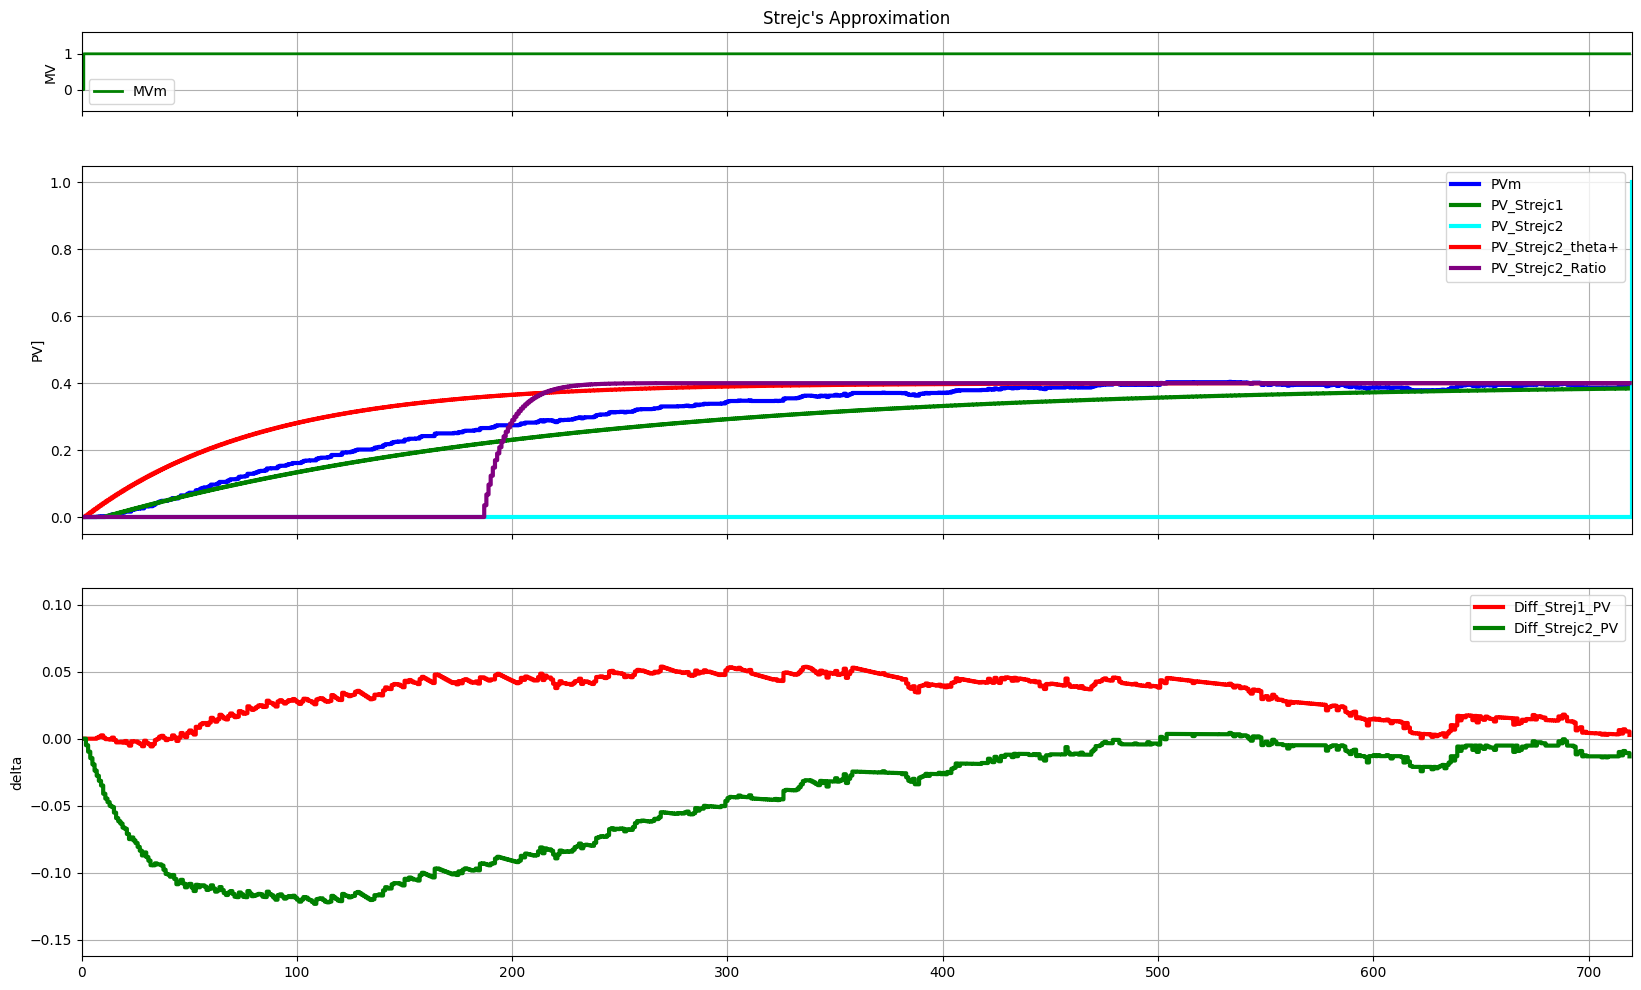

In [7]:

# n-time constants + delay
Kp_Strejc = Kp
a_n = [0, 0.1, 0.22, 0.32, 0.41, 0.49, 0.57]
b_n = [1, 2.72, 3.69, 4.46, 5.12, 5.7, 6.23]

Ratio = T_u/T_g   # 0.090
# print(Ratio)

#----Plot_All_7_orders
# T_Strejc = []
# T_uth = []       # Apparent dead-time
# theta_Strejc = []
# for i in range(len(a_n)):
#     T_Strejc.append(T_g / b_n[i])
#     T_uth.append(a_n[i] * T_g)
#     theta_Strejc.append(T_u - T_uth[i])


#----1st__Order-----
T_Strejc1 = T_g / b_n[0]
T_uth1 = a_n[0] * T_g            # Apparent dead-time
theta_Strejc1 = T_u - T_uth1
print("T_Strejc1 = ", T_Strejc1)
print("T_uth1 = ", T_uth1)
print("theta_Strejc1 = ", theta_Strejc1)


#----2d__Order----- Constant Zero response
T_Strejc2 = T_g / b_n[1]
T_uth2 = a_n[1] * T_g            # Apparent dead-time
theta_Strejc2 = T_u - T_uth2
print("T_Strejc2 = ", T_Strejc2)
print("T_uth2 = ", T_uth2)
print("theta_Strejc2 = ", theta_Strejc2)

#----2d__Order-----      theta not negative
T_Strejc2_1 = T_g / b_n[1]
T_uth2_1 = a_n[1] * T_g            # Apparent dead-time
theta_Strejc2_1 = T_u - T_uth2_1
print("T_Strejc2_1 = ", T_Strejc2_1)
print("T_uth2_1 = ", T_uth2_1)
print("theta_Strejc2_1 = ", theta_Strejc2_1)
theta_Strejc2_1= 1

#----2d__Order-----
T_u = 188
T_g = 28.2                     # Ratio = 0.15
# T_u = 113.33333
# T_g = 17 
T_Strejc2_2 = T_g / b_n[1]
T_uth2_2 = a_n[1] * T_g            # Apparent dead-time
theta_Strejc2_2 = T_u - T_uth2_2
print("T_Strejc2_2 = ", T_Strejc2_2)
print("T_uth2_2 = ", T_uth2_2)
print("theta_Strejc2_2 = ", theta_Strejc2_2)


#FOPDT(MV,Kp,T,theta,Ts,MVInit=0,PVInit=0,method='EBD'):
PV_Strejc_1 = FOPDT(MVm, Kp_Strejc, T_Strejc1, theta_Strejc1, Ts)
# PV_Strejc_2 = FOPDT(MVm, Kp_Strejc, T_Strejc2, theta_Strejc2, Ts)
PV_Strejc_2_1 = FOPDT(MVm, Kp_Strejc, T_Strejc2_1, theta_Strejc2_1, Ts)
PV_Strejc_2_2 = FOPDT(MVm, Kp_Strejc, T_Strejc2_2, theta_Strejc2_2, Ts)




#============PLOT===========================
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,ncols=1, sharex='col', gridspec_kw={'height_ratios': [1.5, 7, 7]})
fig.set_figheight(12)
fig.set_figwidth(20)
ax1.set_title("Strejc's Approximation")

#--MV
limSup = 1.5
limInf = -0.5
l_MV, = ax1.step([0,TSim], [limInf,limSup], 'green',linewidth=2, label='MVm', where="post")
ax1.set_ylabel('MV')
ax1.legend (loc='best')


#----PV
limSup = 1
limInf = 0
l_PV, = ax2.step([0, TSim], [limInf,limSup], 'blue', linewidth=3, label='PVm', where='post') 
l_PV_strj_1, = ax2.step([0, TSim], [limInf,limSup], 'green', linewidth=3, label='PV_Strejc1', where='post')
l_PV_strj_2, = ax2.step([0, TSim], [limInf,limSup], 'cyan', linewidth=3, label='PV_Strejc2', where='post')
l_PV_strj_2_1, = ax2.step([0, TSim], [limInf,limSup], 'red', linewidth=3, label='PV_Strejc2_theta+', where='post')
l_PV_strj_2_2, = ax2.step([0, TSim], [limInf,limSup], 'purple', linewidth=3, label='PV_Strejc2_Ratio', where='post')
ax2.set_ylabel('PV]')
ax2.legend (loc='best')


#---Model_Diff
#max(diff_strejc1_PV, diff_strejc2_theta_PV) + 10
#min(diff_strejc1_PV, diff_strejc2_theta_PV) - 10
diff_strejc1_PV = [a - b for a,b in zip(PVm, PV_Strejc_1)]
diff_strejc2_theta_PV = [a - b for a,b in zip(PVm, PV_Strejc_2_1)]
print("PVstrj1 : ",diff_strejc1_PV)
print("thetaPV : ", diff_strejc2_theta_PV)
limSup = 0.1
limInf = -0.15
l_diff_strejc1_PV, = ax3.step([0, TSim], [limInf,limSup], 'red', linewidth=3, label='Diff_Strej1_PV', where='post') 
l_diff_strejc2_theta_PV, = ax3.step([0, TSim], [limInf,limSup], 'g-', linewidth=3, label='Diff_Strejc2_PV', where='post') 
ax3.set_ylabel('delta')
ax3.legend (loc='best')



#-----Set Data-----
l_MV.set_data(tm, MVm)
l_PV.set_data(tm,PVm)
l_PV_strj_1.set_data(tm, PV_Strejc_1)
# l_PV_strj_2.set_data(tm, PV_Strejc_2)
l_PV_strj_2_1.set_data(tm, PV_Strejc_2_1)
l_PV_strj_2_2.set_data(tm, PV_Strejc_2_2)

l_diff_strejc1_PV.set_data(tm, diff_strejc1_PV)
l_diff_strejc2_theta_PV.set_data(tm, diff_strejc2_theta_PV)

tMax = len(tm)
ax1.set_xlim(0, tMax)
ax2.set_xlim(0, tMax)
ax3.set_xlim(0, tMax)
ax1.grid()
ax2.grid()
ax3.grid()
